In [93]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats
from pathlib import Path
from statistics import mean

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='Times New Roman')

# plot set start
palette = sns.color_palette("tab10")
sns.set_theme(font='Times New Roman', font_scale=1.5)
sns.set_style("white")

In [94]:
def averageResults():
    doplot = False
    for pose in range(16):
        print(pose)
        exp_dirs = (Path('.')/'results'/'exp1').glob('baseline14')
        for exp_dir in exp_dirs:
            print(exp_dir)
            for results_dir in exp_dir.glob('idF5_16users_baseline14_slvrbaseline_ds5_L6_k3_ch32_r1.0_thr0.5'):
                print(results_dir.name)
                # results_dir_split = results_dir.name.split('_')
                resultsDirName = results_dir.name
                for csv_file_path in results_dir.glob(f'*_pose{pose}.csv'):
                    print(csv_file_path.stem)
                    # print(csv_file_path.stem.split('_')[-1])
                    poseNum = csv_file_path.stem.split('_')[-1]
                    df = pd.read_csv(csv_file_path)
                    # print(df)
                    # vmafMean = df['vmaf'].tolist()
                    # print(vmafMean)
                    
                    ax = sns.lineplot(x='Frame', y=f'vmaf', data=df, palette=palette)
                    ax.set(xlabel="Frame", ylabel=f"VMAF")
                    plt.legend(title="")
                    plt.xticks(range(0,91,30))
                    plt.xlim((0,90))
                    plt.ylim((0,33))
                    if doplot:
                        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
                        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
                        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
                        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
                    plt.show()

In [95]:
def mergeAllCsv(expDir: Path):
    allDf = pd.DataFrame()
    for dirPath in expDir.glob('*'):
        # print(dirPath)
        for fileDir in dirPath.glob('*'):
            for filePath in fileDir.glob('*'):
                # print(filePath)
                # print(filePath.stem)
                paras = filePath.stem.split('_')
                # print(paras)
                
                id = f'{paras[0]}_{paras[1]}_{paras[2]}'
                # print(f'id: {id}')
                solverName = paras[3].split('slvr')[-1]
                # print(f'solver: {solverName}')
                downsample = paras[4].split('ds')[-1]
                # print(f'downsample: {downsample}')
                LSize = paras[5].split('L')[-1]
                # print(f'LSize: {LSize}')
                kmax = paras[6].split('k')[-1]
                # print(f'kmax: {kmax}')
                chunkSize = paras[7].split('ch')[-1]
                # print(f'chunkSize: {chunkSize}')
                rr = paras[8].split('r')[-1]
                # print(f'rr: {rr}')
                threshold_coverage = paras[9].split('thr')[-1]
                # print(f'threshold_coverage: {threshold_coverage}')
                pose = paras[-1].split('pose')[-1]
                # print(f'pose: {pose}')

                fileDf = pd.read_csv(filePath)
                fileDf = fileDf[['Frame','psnr_y','float_ssim','vmaf']]
                fileDf['id'] = id
                fileDf['solverName'] = solverName
                fileDf['downsample'] = downsample
                fileDf['LSize'] = LSize
                fileDf['kmax'] = kmax
                fileDf['chunkSize'] = chunkSize
                fileDf['rr'] = rr
                fileDf['threshold_coverage'] = threshold_coverage
                fileDf['pose'] = pose
                
                fileDf = fileDf[['id','solverName','downsample','LSize','kmax','chunkSize','rr','threshold_coverage','pose','Frame','psnr_y','float_ssim','vmaf']]
                # print(fileDf)
                allDf = allDf.append(fileDf)
    
    allDf.to_csv('allResults.csv',index=None)
            

In [96]:
def allResultAverage(filePath: Path):
    doplot = False

    df = pd.read_csv(filePath)
    # print(df)
    allIdList = df['id'].unique()
    print(allIdList)

    resultHeader = ['id','psnr','ssim','vmaf']

    resultDf = pd.DataFrame(columns = resultHeader)
    for id in allIdList:
        tmp_df = df.loc[df['id'] == id]
        psnrMean = tmp_df['psnr_y'].mean()
        ssimMean = tmp_df['float_ssim'].mean()
        vmafMean = tmp_df['vmaf'].mean()
        print(f'{id}: {psnrMean} {ssimMean} {vmafMean}')
        resultDf = resultDf.append(pd.DataFrame([[id,psnrMean,ssimMean,vmafMean]],columns=resultHeader),ignore_index=True)
    print(resultDf)

    # psnr
    ax = sns.barplot(x='id', y=f'psnr', data=resultDf, palette=palette)
    ax.set(xlabel="id", ylabel=f"PSNR")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # ssim
    ax = sns.barplot(x='id', y=f'ssim', data=resultDf, palette=palette)
    ax.set(xlabel="id", ylabel=f"SSIM")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # vmaf
    ax = sns.barplot(x='id', y=f'vmaf', data=resultDf, palette=palette)
    ax.set(xlabel="id", ylabel=f"VMAF")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()



In [ ]:
def allResultAverage(filePath: Path):
    doplot = False

    df = pd.read_csv(filePath)
    # print(df)
    allIdList = df['id'].unique()
    print(allIdList)

    resultHeader = ['id','psnr','ssim','vmaf']

    resultDf = pd.DataFrame(columns = resultHeader)
    for id in allIdList:
        tmp_df = df.loc[df['id'] == id]
        psnrMean = tmp_df['psnr_y'].mean()
        ssimMean = tmp_df['float_ssim'].mean()
        vmafMean = tmp_df['vmaf'].mean()
        print(f'{id}: {psnrMean} {ssimMean} {vmafMean}')
        resultDf = resultDf.append(pd.DataFrame([[id,psnrMean,ssimMean,vmafMean]],columns=resultHeader),ignore_index=True)
    print(resultDf)

    # psnr
    ax = sns.barplot(x='id', y=f'psnr', data=resultDf, palette=palette)
    ax.set(xlabel="id", ylabel=f"PSNR")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # ssim
    ax = sns.barplot(x='id', y=f'ssim', data=resultDf, palette=palette)
    ax.set(xlabel="id", ylabel=f"SSIM")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()

    # vmaf
    ax = sns.barplot(x='id', y=f'vmaf', data=resultDf, palette=palette)
    ax.set(xlabel="id", ylabel=f"VMAF")
    # plt.legend(title="")
    plt.xticks(rotation=-90)
    # plt.xticks(range(0,91,30))
    # plt.xlim((0,90))
    # plt.ylim((0,33))
    if doplot:
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.eps', dpi=300, pad_inches=0, bbox_inches='tight')
        plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_pose0_2_4.png', dpi=300, pad_inches=0, bbox_inches='tight')
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.eps', dpi=300)
        # plt.savefig(f'./img/frame_to_frame_quality/psnr_frame_pose_in_6x6_ArchVizInterior_rec20_AdditiveSynthesizer_all_pose.png', dpi=300)
    plt.show()



/Users/sunyuanjun/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (2,3,4,5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


['idF5_16users_baseline14' 'idF5_16users_slvrNSA'
 'idF5_16users_slvrNSA2Relaxed' 'idF5_16users_slvrNSA2'
 'idF5_16users_slvrsetCoverGreedy']
idF5_16users_baseline14: 14.334166117417112 0.5816157123730585 1.3557281524118876
idF5_16users_slvrNSA: 14.143433265372982 0.6262271792674731 6.7187665375672045
idF5_16users_slvrNSA2Relaxed: 13.644119668447582 0.6033087996639783 5.550345289952957
idF5_16users_slvrNSA2: 13.468349460651883 0.6012683564852151 5.146992212651208
idF5_16users_slvrsetCoverGreedy: 14.30319875389785 0.6263246983534946 7.330964216465053
                                id       psnr      ssim      vmaf
0          idF5_16users_baseline14  14.334166  0.581616  1.355728
1             idF5_16users_slvrNSA  14.143433  0.626227  6.718767
2     idF5_16users_slvrNSA2Relaxed  13.644120  0.603309  5.550345
3            idF5_16users_slvrNSA2  13.468349  0.601268  5.146992
4  idF5_16users_slvrsetCoverGreedy  14.303199  0.626325  7.330964


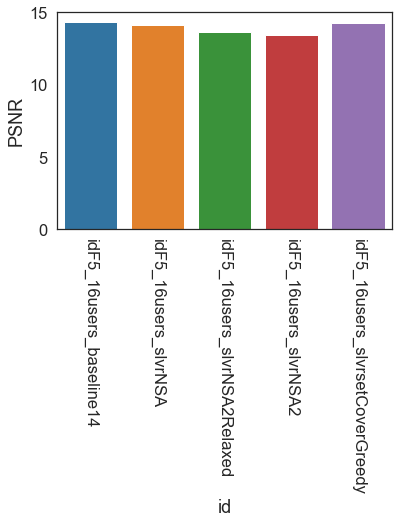

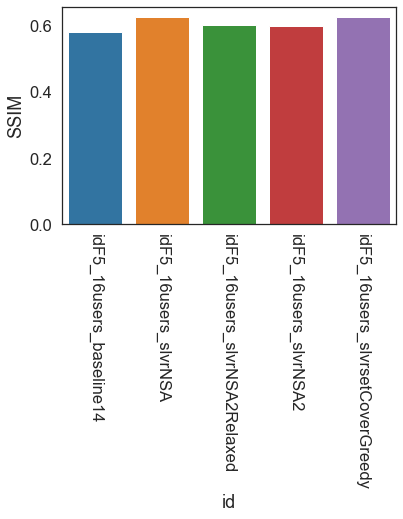

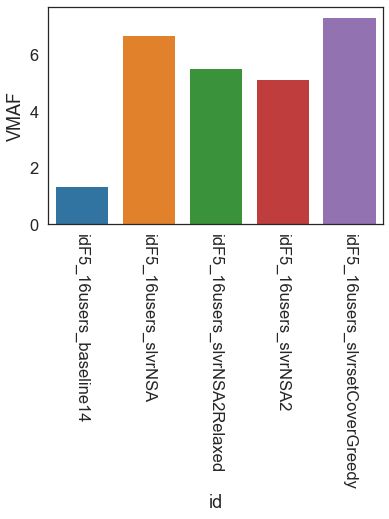

In [97]:
if __name__ == '__main__':
    # expDir = Path('./exp1')
    # mergeAllCsv()
    allResultFilePath = Path('./allResults.csv')
    allResultAverage(allResultFilePath)